<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-lorgid1/blob/master/Examen1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import time
import os
import psutil
import statistics


In [0]:
def huella_de_memoria():
  ''' Regresa la memoria usada por un proceso en Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [4]:
!wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z --no-check-certificate


--2019-06-26 21:30:07--  https://archive.org/download/nycTaxiTripData2013/trip_data.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z [following]
--2019-06-26 21:30:07--  https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z
Resolving ia802501.us.archive.org (ia802501.us.archive.org)... 207.241.228.191
Connecting to ia802501.us.archive.org (ia802501.us.archive.org)|207.241.228.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4102781969 (3.8G) [application/x-7z-compressed]
Saving to: ‘trip_data.7z’

trip_data.7z        100%[===================>]   3.82G  11.1MB/s    in 5m 26s  

2019-06-26 21:35:34 (12.0 MB/s) - ‘trip_data.7z’ saved [4102781969/4102781969]



In [145]:
ls

sample_data/  trip_data_1.csv  trip_data.7z


In [0]:
!rm trip_data_1.csv -r

In [6]:
!7z l trip_data.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4102781969 bytes (3913 MiB)

Listing archive: trip_data.7z

--
Path = trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

   Date      Time    Attr         Size   Compressed  Name
------------------- ----- ------------ ------------  ------------------------
2014-05-12 22:02:53 ....A   2459600863    345687208  trip_data_1.csv
2014-01-15 06:55:32 ....A   2502278613    358624764  trip_data_10.csv
2014-01-15 07:34:24 ....A   2395449056    342987617  trip_data_11.csv
2014-01-15 08:09:28 ....A   2327237611    331056148  trip_data_12.csv
2014-05-12 22:08:09 ....A   2328673265    327374725  trip_data_2.csv
2013-08-26 02:19:46 ....A   2622301287    371026139  trip_data

In [7]:
# Generar plantilla de archivos
plantilla = 'trip_data_{:d}.csv'
archivos = [plantilla.format(y) for y in range(1,13)]
archivos


['trip_data_1.csv',
 'trip_data_2.csv',
 'trip_data_3.csv',
 'trip_data_4.csv',
 'trip_data_5.csv',
 'trip_data_6.csv',
 'trip_data_7.csv',
 'trip_data_8.csv',
 'trip_data_9.csv',
 'trip_data_10.csv',
 'trip_data_11.csv',
 'trip_data_12.csv']

In [10]:
%%time
forma = []
columnas = []
tiempoPandas = []
huellaMemoria = []
dataTypes = []
datosNulos = []
datosNaN = []



for archivo in archivos:
  comando = "7z e trip_data.7z "+ archivo
  os.system(comando)

  memoriaAntes = huella_de_memoria()
  t_start = time.time()
  df = pd.read_csv(archivo)
  
  # Tiempo en leer 
  t_end = time.time()
  
  # Memoria utilizada
  memoriaDespues = huella_de_memoria()
  
  # Forma del dataframe
  shapeArchivo = df.shape
  forma.append(shapeArchivo)
  
  # Nombre de las columnas
  nombreColumnas = df.columns 
  
  # Data types
  tiposDeDatos = df.dtypes
  
  # Datos nulos
  datosNulosColumnas = df.isnull().sum()
  
  # NaN
  datosNaNColumnas = df.isna().sum()
  
  
  
  # Appends
  columnas.append(nombreColumnas)
  tiempoPandas.append(t_end-t_start)
  huellaMemoria.append(memoriaDespues-memoriaAntes)
  dataTypes.append(tiposDeDatos)
  datosNulos.append(datosNulosColumnas)
  datosNaN.append(datosNaNColumnas)
  
  comando2 = "rm " + archivo
  os.system(comando2)

<string>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 12min 9s, sys: 1min 10s, total: 13min 19s
Wall time: 22min 28s


In [11]:
# Prints
print("")
print("Nombre del archivo:")
print(archivo)
print("")
print("Forma de los archivos:")
print(forma)
print("")
print("Tiempo que tarda en cargar de csv a dataframe: ")
print(tiempoPandas)
print("Tiempo promedio que tarda en cargar: ", statistics.mean(tiempoPandas))
print("")
print("Huella de memoria de cada uno de los archivos: ")
print(huellaMemoria)
print("Huella de memoria promedio de los archivos: ", statistics.mean(huellaMemoria))
print("")


Nombre del archivo:
trip_data_12.csv

Forma de los archivos:
[(14776615, 14), (13990176, 14), (15749228, 14), (15100468, 14), (15285049, 14), (14385456, 14), (13823840, 14), (12597109, 14), (14107693, 14), (15004556, 14), (14388451, 14), (13971118, 14)]

Tiempo que tarda en cargar de csv a dataframe: 
[57.161452770233154, 52.619306564331055, 58.906920194625854, 58.09821605682373, 56.47922611236572, 52.25586009025574, 51.17481064796448, 47.66606903076172, 53.02080988883972, 56.60367298126221, 54.206111669540405, 50.58388137817383]
Tiempo promedio que tarda en cargar:  54.06469478209814

Huella de memoria de cada uno de los archivos: 
[1372.0078125, 891.7265625, 2079.10546875, 2120.9921875, 1615.46484375, 1494.359375, 958.41015625, 809.05078125, 1788.546875, 1550.1953125, 1473.8984375, 1353.54296875]
Huella de memoria promedio de los archivos:  1458.9417317708333



In [12]:
# Las columnas en todos los archivos son iguales, pero despues del archivo tres
# hay espacios vacios al principio de muchos de los titulos de columna
print("Columnas en cada archivo: ")
print(columnas)
print("")

# Todos los data types son iguales en los diferentes archivos
print("Tipo de datos de las columnas: ")
print(dataTypes)
print("")


# La mayor parte de los datos nulos se encuentra dentro de la columna
# store_and_fwd_flag. Exiten ademas en las columnasdropoff_longitude y la
# dropoff_latitude conun maximo de 754 casos y un minimo de 39 en los
# diferentes archivos
print("Datos nulos en las columnas de los archivos: ")
print(datosNulos)
print("")
# Los datos Nan se repiten en la misma forma y frecuencia que los datos
# de los datos nulos
print("Datos NaN en las columnas de los archivos: ")
print(datosNaN)
print("")
print("")

Columnas en cada archivo: 
[Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object'), Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object'), Index(['medallion', ' hack_license', ' vendor_id', ' rate_code',
       ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latitude'],
      dtype='object'), Index(['medallion', ' h

In [0]:
%%time
mediaDistancia = []
tiempoMediaDistancia = []
nombreColumnas =[]
contador = 1

for archivo in archivos:
  comando = "7z e trip_data.7z "+ archivo
  os.system(comando)
  df = pd.read_csv(archivo)
  #df = pd.read_csv(archivo, usecols=["medallion",  "pickup_datetime", "dropoff_datetime", "passenger_count", "trip_time_in_secs", "trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])
  # Adrian 
  
  # Quitar espacios de los titulos de las columnas ya no
  df= df.rename(columns=lambda x: x.strip())

  inicio = time.time()
  noEsCero = (df['trip_distance'] != 0)
  
  # Calcular media de distancia
  media = noEsCero.mean()
  
  # Calcular tiempo de distancia
  fin = time.time()
  
  # Appends
  mediaDistancia.append(media)
  tiempoMediaDistancia.append(fin-inicio)
  
  #Alexis y Samuel
  comando2 = "rm " + archivo
  os.system(comando2)
  

 


In [14]:
# Prints
print("")
print("Distancia media de los diferentes archivos: ")
print(mediaDistancia)
print("Media de disatancia media: ", statistics.mean(mediaDistancia))
print("")


print("Tiempo de pandas en calcular la media en los diferentes archivos: ")
print(tiempoMediaDistancia)
print("Tiempo medio de pandas para calcular media: ", statistics.mean(tiempoMediaDistancia))
print("")


Distancia media de los diferentes archivos: 
[0.994357571067528, 0.9947217247302679, 0.9946776438819731, 0.9925653297632895, 0.990490773042337, 0.9945056312431111, 0.9945438459935879, 0.9874100478133515, 0.994360098422896, 0.9944898069626319, 0.9946273577329484, 0.9943904990280663]
Media de disatancia media:  0.9934283608068324

Tiempo de pandas en calcular la media en los diferentes archivos: 
[0.05291628837585449, 0.04222893714904785, 0.05352973937988281, 0.04888200759887695, 0.052115440368652344, 0.047379493713378906, 0.046559810638427734, 0.04340004920959473, 0.0429224967956543, 0.04631686210632324, 0.0432279109954834, 0.0426945686340332]
Tiempo medio de pandas para calcular media:  0.046847800413767494



In [0]:
import dask
import dask.dataframe as dd

In [0]:
%%time
mediaDistanciaDask = []
tiempoMediaDistanciaDask = []
contador = 1


for archivo in archivos:
  comando = "7z e trip_data.7z "+ archivo
  os.system(comando)
  
  
  

  if contador > 2:
    
    df = dd.read_csv(archivo, usecols= [" trip_distance"])
    noEsCero = (df[' trip_distance'] != 0)
    
  else:
    
    df = dd.read_csv(archivo, usecols= ["trip_distance"])
    noEsCero = (df['trip_distance'] != 0)
    
  
  
  # Calcular media de distancia
  media = noEsCero.mean()
  
  t_start = time.time()
  mediaComputada = media.compute()
  # Tiempo en leer 
  t_end = time.time()
  
  mediaDistanciaDask.append(mediaComputada)
  tiempoMediaDistanciaDask.append(t_end-t_start)

  comando2 = "rm " + archivo
  os.system(comando2)
  
  contador += 1





In [32]:
# Prints
print("")
print("Distancia media de los diferentes archivos calculados con Dask: ")
print(mediaDistanciaDask)
print("Media de disatancia media: ", statistics.mean(mediaDistanciaDask))
print("")


print("Tiempo de pandas en calcular la media en los diferentes archivos calculados con Dask: ")
print(tiempoMediaDistanciaDask)
print("Tiempo medio de dask para calcular media: ", statistics.mean(tiempoMediaDistanciaDask))
print("")


Distancia media de los diferentes archivos calculados con Dask: 
[0.994357571067528, 0.9947217247302679, 0.9946776438819731, 0.9925653297632895, 0.990490773042337, 0.9945056312431111, 0.9945438459935879, 0.9874100478133515, 0.994360098422896, 0.9944898069626319, 0.9946273577329484, 0.9943904990280663]
Media de disatancia media:  0.9934283608068324

Tiempo de pandas en calcular la media en los diferentes archivos calculados con Dask: 
[16.156013011932373, 15.04652714729309, 17.377537727355957, 16.739305019378662, 16.904510021209717, 15.533940553665161, 14.907286882400513, 13.67201566696167, 15.826802730560303, 16.74826455116272, 15.537600040435791, 15.000643014907837]
Tiempo medio de dask para calcular media:  15.787537197271982



In [147]:
%%time
# media trip time in seconds

mediaTripTimeInSecsLista = []
tiempoTripTimeInSecsLista = []

contador = 1

for archivo in archivos:
  comando = "7z e trip_data.7z "+ archivo
  os.system(comando)  
  
  if contador > 2:
    
    df = dd.read_csv(archivo, usecols= [" trip_time_in_secs"])
    mediaTripTimeInSecs = df[" trip_time_in_secs"].mean()
    
  else:
    
    df = dd.read_csv(archivo, usecols= ["trip_time_in_secs"])
    mediaTripTimeInSecs = df["trip_time_in_secs"].mean()
    
  

  
  t_start = time.time()
  media = mediaTripTimeInSecs.compute()
  # Tiempo en leer 
  t_end = time.time()
    
    
    
  tiempoTripTimeInSecsLista.append(t_end-t_start)
  mediaTripTimeInSecsLista.append(media)
    
  comando2 = "rm " + archivo
  os.system(comando2)
  
  contador += 1
  


CPU times: user 3min 53s, sys: 34.2 s, total: 4min 27s
Wall time: 26min 53s


In [148]:
# Prints
print("")
print("Media del tiempo de los diferentes archivos calculados con Dask: ")
print(mediaTripTimeInSecsLista)
print("Media de disatancia media: ", statistics.mean(mediaTripTimeInSecsLista))
print("")


print("Tiempo de pandas en calcular la media en los diferentes archivos calculados con Dask: ")
print(tiempoTripTimeInSecsLista)
print("Tiempo medio de dask para calcular media: ", statistics.mean(tiempoTripTimeInSecsLista))
print("")


Media del tiempo de los diferentes archivos calculados con Dask: 
[683.4235930894863, 701.8564614912635, 717.4479485597643, 746.6080731405145, 779.9036977244888, 781.1082311189857, 749.5073767491522, 1557.1494815993099, 784.6852788049754, 784.1873019101665, 774.8412066733243, 788.1564430992566]
Media de disatancia media:  820.7395911633906

Tiempo de pandas en calcular la media en los diferentes archivos calculados con Dask: 
[91.51746773719788, 87.03771710395813, 97.72762489318848, 94.19968461990356, 94.83078217506409, 89.83188104629517, 86.08968591690063, 73.26961946487427, 88.17147660255432, 93.49993062019348, 89.37638187408447, 87.03253316879272]
Tiempo medio de dask para calcular media:  89.3820654352506



In [109]:
%%time
contador = 1
diferenciaTiemposArchivos = []
mediaDiferenciaTiemposArchivos = []
viajesLargosCount = []
taxisViajesLargosCount = []
topViajesTaxis = []
taxiMasViajesLista = []
pasajerosPorHoraCount = []
pasajerosPorDiaSemanaCount = []
pasajerosPorDiaCount = []
dataFramesMejorTaxi = []


for archivo in archivos:
  comando = "7z e trip_data.7z "+ archivo
  os.system(comando)

  if contador > 2:
    df = dd.read_csv(archivo, usecols= ["medallion", " passenger_count", " trip_time_in_secs", " pickup_datetime"," dropoff_datetime"," pickup_longitude", " pickup_latitude", " dropoff_longitude", " dropoff_latitude"])
    df[" pickup_datetime"] = dd.to_datetime(df[" pickup_datetime"])
    df[" dropoff_datetime"] = dd.to_datetime(df[" dropoff_datetime"])
    df['drop_pickup'] = df[" dropoff_datetime"] - df[" pickup_datetime"]
    df['drop_pickup'] = df['drop_pickup'].dt.total_seconds() # Adrian convertir a segundos
    df['hour'] = df[' dropoff_datetime'].dt.hour
    df['dia'] = df[' dropoff_datetime'].dt.day
    df['diasemana'] = df[' dropoff_datetime'].dt.weekday
    
    #Calcular diferencia de tiempos
    df["diferencia"] = df['drop_pickup'] - df[" trip_time_in_secs"]
    # Definir si es un viaje largo
    esLargo = df[(df[" trip_time_in_secs"]>(20*60))]
     
  else:
    
    df = dd.read_csv(archivo, usecols= ["medallion", "passenger_count", "trip_time_in_secs", "pickup_datetime", "dropoff_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])
    df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
    df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
    df['drop_pickup'] = df["dropoff_datetime"] - df["pickup_datetime"]
    df['drop_pickup'] = df['drop_pickup'].dt.total_seconds() # Adrian convertir a segundos
    df['hour'] = df['dropoff_datetime'].dt.hour
    df['dia'] = df['dropoff_datetime'].dt.day
    df['diasemana'] = df['dropoff_datetime'].dt.weekday
    
    
    # Calcular diferencia de tiempos
    df["diferencia"] = df['drop_pickup'] - df["trip_time_in_secs"]
    # Definir si es un viaje largo
    esLargo = df[(df["trip_time_in_secs"]>(20*60))]
    

    
  datos = df.compute()
  diferenciaTiempos = datos['diferencia'].value_counts() # Luis Daniel contar valores
  
  
  
  if contador > 2:
    
    hora = datos.groupby("hour")
    pasajerosHora = hora[" passenger_count"].sum()

    diaSemana = datos.groupby("diasemana")
    pasajerosDiaSemana = diaSemana[" passenger_count"].sum()

    dia = datos.groupby("dia")
    pasajerosDia = dia[" passenger_count"].sum()
    
  else:
    
    hora = datos.groupby("hour")
    pasajerosHora = hora["passenger_count"].sum()

    diaSemana = datos.groupby("diasemana")
    pasajerosDiaSemana = diaSemana["passenger_count"].sum()

    dia = datos.groupby("dia")
    pasajerosDia = dia["passenger_count"].sum()

    
    
  viajesLargos = esLargo.compute()
  topTenTaxis = viajesLargos['medallion'].value_counts().nlargest(25)
  taxiMasViajes =  topTenTaxis.index[0]
  
  mejorTaxiDataFrame = datos[datos.medallion == taxiMasViajes]
  
 
  # Appends
  diferenciaTiemposArchivos.append(diferenciaTiempos)
  mediaDiferenciaTiemposArchivos.append(datos['diferencia'].mean())
  viajesLargosCount.append(viajesLargos.count)
  topViajesTaxis.append(topTenTaxis)
  taxiMasViajesLista.append(taxiMasViajes)
  pasajerosPorHoraCount.append(pasajerosHora)
  pasajerosPorDiaSemanaCount.append(pasajerosDiaSemana)
  pasajerosPorDiaCount.append(pasajerosDia)
  dataFramesMejorTaxi.append(mejorTaxiDataFrame)
  
  
  # Prints
  #print("")
  #print("Diferencia de tiempos por archivo:")
  #print(diferenciaTiempos)
  print("")
  print("Media de diferencia tiempos por archivo:")
  print(mediaDiferenciaTiemposArchivos)
  print("")
  print("25 taxis con mas viajes por archivo:")
  print(topTenTaxis)
  print("")
  print("Taxi con mas viajes por archivo:")
  print(taxiMasViajes)
  print("")
  print("Cuenta de viajes largos por archivo:")
  print(viajesLargosCount)
  print("")
  print("Suma de pasajeros por hora por archivo:")
  print(pasajerosPorHoraCount)
  print("")
  print("Suma de pasajeros por dia de la semana por archivo:")
  print(pasajerosPorDiaSemanaCount)
  print("")
  print("Suma de pasajeros por dia por archivo:")
  print(pasajerosPorDiaCount)
  print("")
  print("Dataframe del taxi con mas viajes por archivo:")
  print(dataFramesMejorTaxi)
  print("")

  
  
  
  

  
    

  comando2 = "rm " + archivo
  os.system(comando2)
  
  contador += 1




Media de diferencia tiempos por archivo:
[2.137628543479004]

25 taxis con mas viajes por archivo:
DAF57CF25F00457CC6077CD628EC71AC    272
0076C8327A95E988E721AC33B0FA9D67    270
1E7C1EB194CCFD58634305DBE0588B85    269
91FD7951320B9228789AF90613D90254    259
8B1E839B6A76E16B17F1A32235E3F7BA    251
BC41253BA5B3EA6228EC1357F3F1097D    251
832154570CFDD2D7E601518117B187DE    249
5A499D2577B8CAAC1304000D3F5DD3A7    243
A7F179FDE022F185512923BA504DD71C    243
4DC83B013057503607E85BC4BB6581CE    239
49334C97C476E41CD91935E6470F8519    239
97E2116EEB09AF20718CC464A13675EB    235
7912D5502E04ADA602F63554B73C9D24    235
8211BE04462ADE4621B68E1DFEA54754    233
4E834DFB7A8831D0A5B6F9B80092A61F    233
C2EA658E33567166B26AA509A65F28A8    233
6BD1B641A1CD55803A21560299B985A7    232
92C50025CDE1B8E8AFA65CC9A5CA82CB    230
6B19837BFEAA374B7B4694799D7CC746    230
8B33313786A76D54A25E2D4D04F6B9B7    229
B471B4206064A6F9FBDDB4BB45804AD1    228
89AC2013723DAC319A06BB59B812F546    228
89CBEA6E90D9A9673386

In [0]:
import matplotlib.pyplot as plt

Pasajeros por hora:



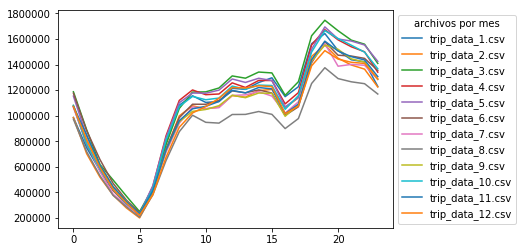

In [127]:
zzz =0
print("Pasajeros por hora:")
print("")
for ph in pasajerosPorHoraCount:
  plt.plot(ph, label = archivos[zzz]) #Adrian
  zzz+=1
  plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5)) # Adrian
  


Pasajeros por dia de la semana:



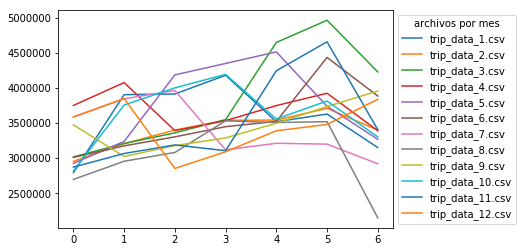

In [128]:
zzz =0
print("Pasajeros por dia de la semana:")
print("")
for pds in pasajerosPorDiaSemanaCount:
  plt.plot(pds, label = archivos[zzz]) #Adrian
  zzz+=1
  plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5)) # Adrian
  

Pasajeros por dia:



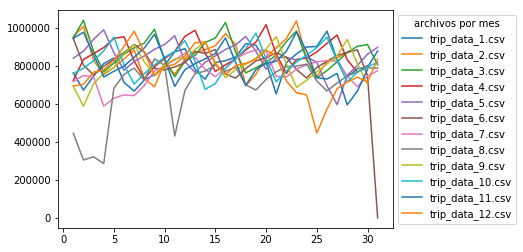

In [129]:
zzz =0
print("Pasajeros por dia:")
print("")
for pd in pasajerosPorDiaCount:
  plt.plot(pd, label = archivos[zzz]) #Adrian
  zzz+=1
  plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5)) # Adrian

In [166]:
!pip install pyproj

     |████████████████████████████████| 11.2MB 4.6MB/s 


In [199]:


import math
from ast import literal_eval
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
import decimal
import numpy as np
from pyproj import Proj, transform


def merc(CoordinatesY, CoordinatesX):
  
  outProj = Proj(init='epsg:3857')
  inProj = Proj(init='epsg:4326')
  lat = CoordinatesY
  lon = CoordinatesX
  
  x,y = transform(inProj,outProj,lon,lat) # Adrian
  
  
  return y,x



contador = 1

lista =["p1","p2","p3","p4","p5","p6","p7","p8","p9","p10","p11","p12"]



print("")
print("Mapas pickup por archivo:")
print("")

ploter = lista[contador]
for mt in dataFramesMejorTaxi:
  print(archivos[contador-1],":")
  if contador > 2:
    y = mt[" pickup_latitude"].to_numpy()
    x = mt[" pickup_longitude"].to_numpy(copy = True)

    yPlot, xPlot = merc(y, x)

  else:
    y = mt["pickup_latitude"].to_numpy()
    x = mt["pickup_longitude"].to_numpy()
    yPlot, xPlot = merc(y, x)

  contador += 1



  ploter = figure(x_axis_type="mercator", y_axis_type="mercator", x_range = (-8242000,-8210000), y_range= (4965000,4990000) )
  ploter.add_tile(CARTODBPOSITRON)
  ploter.circle(x = xPlot, y = yPlot, line_color=None)
  output_notebook()
  show(ploter)


trip_data_1.csv :


Loading BokehJS ...

trip_data_2.csv :


Loading BokehJS ...

trip_data_3.csv :


Loading BokehJS ...

trip_data_4.csv :


Loading BokehJS ...

trip_data_5.csv :


Loading BokehJS ...

trip_data_6.csv :


Loading BokehJS ...

trip_data_7.csv :


Loading BokehJS ...

trip_data_8.csv :


Loading BokehJS ...

trip_data_9.csv :


Loading BokehJS ...

trip_data_10.csv :


Loading BokehJS ...

trip_data_11.csv :


Loading BokehJS ...

trip_data_12.csv :


Loading BokehJS ...

In [201]:
contador = 1

lista =["p1","p2","p3","p4","p5","p6","p7","p8","p9","p10","p11","p12"]



print("")
print("Mapas dropoff por archivo:")
print("")

ploter = lista[contador]
for mt in dataFramesMejorTaxi:
  print(archivos[contador-1],":")
  if contador > 2:
    y = mt[" dropoff_latitude"].to_numpy()
    x = mt[" dropoff_longitude"].to_numpy(copy = True)

    yPlot, xPlot = merc(y, x)

  else:
    y = mt["dropoff_latitude"].to_numpy()
    x = mt["dropoff_longitude"].to_numpy()
    yPlot, xPlot = merc(y, x)

  contador += 1



  ploter = figure(x_axis_type="mercator", y_axis_type="mercator", x_range = (-8242000,-8210000), y_range= (4965000,4990000) )
  ploter.add_tile(CARTODBPOSITRON)
  ploter.circle(x = xPlot, y = yPlot, line_color=None)
  output_notebook()
  show(ploter)



Mapas dropoff por archivo:

trip_data_1.csv :


Loading BokehJS ...

trip_data_2.csv :


Loading BokehJS ...

trip_data_3.csv :


Loading BokehJS ...

trip_data_4.csv :


Loading BokehJS ...

trip_data_5.csv :


Loading BokehJS ...

trip_data_6.csv :


Loading BokehJS ...

trip_data_7.csv :


Loading BokehJS ...

trip_data_8.csv :


Loading BokehJS ...

trip_data_9.csv :


Loading BokehJS ...

trip_data_10.csv :


Loading BokehJS ...

trip_data_11.csv :


Loading BokehJS ...

trip_data_12.csv :


Loading BokehJS ...